# Sentifi Assignment

In [1117]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


## 1. Data Cleaning

## **a) Remove all row that have any empty value**

In [1118]:
#read the data
df = pd.read_csv('data/da_assignment.csv', header=0)
df[:5]

,publication_time,publication_id,duplicate_id,publication_channel,publication_language,predicted_relevance_probability,topic,is_relevant,verification_date
0,2017-04-26T19:51:29,5900fa4c26d815005b0e12fb,58f61e2826fae8266a5c5c55,twitter,de,0.8309,Financial Services,True,2017-04-28
1,2017-04-26T13:38:00,5900a3930527ca0036073b81,58f61e2826fae8266a5c5c55,news,de,0.9015,Financial Services,True,2017-04-28
2,2017-05-03T06:38:00,5909845c6961040062ae9a45,58f61e2826fae8266a5c5c55,news,de,0.8146,Technology,True,2017-04-05
3,2017-05-03T13:29:47,5909db5626d81500abd24913,58f61e2826fae8266a5c5c55,twitter,de,0.7276,Technology,True,2017-04-05
4,2017-05-03T18:36:55,590a2363fa50770923db8ca9,58f61e2826fae8266a5c5c55,news,de,0.8017,Technology,True,2017-04-05


In [1119]:
#take a look at the data.
df.describe(include='all')

,publication_time,publication_id,duplicate_id,publication_channel,publication_language,predicted_relevance_probability,topic,is_relevant,verification_date
count,1818,1817,1816,1818,1818,1816.000000,1737,1483,1818
unique,1564,1609,532,3,2,NaN,25,2,57
top,2017-05-25T21:19:15,59268355103c8c012636b002,57b4a94f421d85006639a820,twitter,en,NaN,Technology,True,2017-05-26
freq,8,4,342,934,1117,NaN,442,1454,339
mean,NaN,NaN,NaN,NaN,NaN,0.865245,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,0.115405,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.830750,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,0.875500,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,0.958450,NaN,NaN,NaN


__Let see do we have any na value in the data set?__

In [1120]:
#compute the number of na entry for each column
df.isnull().sum()

publication_time                     0
publication_id                       1
duplicate_id                         2
publication_channel                  0
publication_language                 0
predicted_relevance_probability      2
topic                               81
is_relevant                        335
verification_date                    0
dtype: int64

In [1121]:
#remove all the data points have any entry is na value.
dfClean = df.dropna(how='any')
dfClean.isnull().sum()

publication_time                   0
publication_id                     0
duplicate_id                       0
publication_channel                0
publication_language               0
predicted_relevance_probability    0
topic                              0
is_relevant                        0
verification_date                  0
dtype: int64

In [1122]:
#take a carefull look at column predicted_relevance_probability
dfClean['predicted_relevance_probability'].unique() #every think look normal

array([ 0.8309,  0.9015,  0.8146,  0.7276,  0.8017,  0.8044,  0.8774,
        0.8152,  0.7621,  0.802 ,  0.7751,  0.7895,  0.7862,  0.8161,
        0.8035,  0.8471,  0.406 ,  0.859 ,  0.8322,  0.9432,  0.9458,
        0.9346,  0.8075,  0.8045,  0.8285,  0.9616,  0.9614,  0.9273,
        0.9124,  0.9327,  0.9425,  0.9491,  0.7908,  0.702 ,  0.695 ,
        0.7798,  0.686 ,  0.8365,  0.6794,  0.6757,  0.9832,  0.9988,
        0.8722,  0.7847,  0.7848,  0.945 ,  0.8412,  0.8353,  0.7863,
        0.9261,  0.7859,  0.9634,  0.9638,  0.9688,  0.9698,  0.967 ,
        0.9615,  0.9679,  0.8752,  0.9617,  0.9625,  0.964 ,  0.9635,
        0.9629,  0.9624,  0.9399,  0.886 ,  0.97  ,  0.9651,  0.9653,
        0.9655,  0.9664,  0.8723,  0.9658,  0.9628,  0.9637,  0.9649,
        0.9648,  0.8626,  0.9669,  0.9668,  0.9609,  0.9636,  0.9677,
        0.9733,  0.9696,  0.9736,  0.9727,  0.9811,  0.9639,  0.9384,
        0.9627,  0.9686,  0.8662,  0.9631,  0.9632,  0.9077,  0.9726,
        0.9761,  0.9

In [1123]:
dfClean['is_relevant'].value_counts() # the data set is unbalance heavily!

True     1387
False      17
Name: is_relevant, dtype: int64

__Now we have a clean data set without any na data point__

## b) Remove duplicate row base on some rule

In [1124]:
#first take a look at duplicated data base on criteria.
dfClean[dfClean.duplicated(['duplicate_id'])]

,publication_time,publication_id,duplicate_id,publication_channel,publication_language,predicted_relevance_probability,topic,is_relevant,verification_date
1,2017-04-26T13:38:00,5900a3930527ca0036073b81,58f61e2826fae8266a5c5c55,news,de,0.9015,Financial Services,True,2017-04-28
2,2017-05-03T06:38:00,5909845c6961040062ae9a45,58f61e2826fae8266a5c5c55,news,de,0.8146,Technology,True,2017-04-05
3,2017-05-03T13:29:47,5909db5626d81500abd24913,58f61e2826fae8266a5c5c55,twitter,de,0.7276,Technology,True,2017-04-05
4,2017-05-03T18:36:55,590a2363fa50770923db8ca9,58f61e2826fae8266a5c5c55,news,de,0.8017,Technology,True,2017-04-05
5,2017-05-03T07:38:00,59098e4a628fcf005d8334b8,58f61e2826fae8266a5c5c55,news,de,0.8044,Technology,True,2017-04-05
6,2017-05-04T17:38:00,590b67ad4836f40036d5785c,58f61e2826fae8266a5c5c55,news,de,0.8774,Telecommunications,True,2017-05-05
7,2017-05-04T19:43:29,590b848cfa50770923e04ce4,58f61e2826fae8266a5c5c55,news,de,0.8152,Technology,True,2017-05-05
8,2017-05-03T07:21:42,59098506a30a1d005ef71b5e,58f61e2826fae8266a5c5c55,news,de,0.7621,Consumer Services,True,2017-05-05
9,2017-05-05T17:17:58,590cb3c60527ca003607b2c6,58f61e2826fae8266a5c5c55,news,de,0.8020,Industrials,True,2017-09-05
10,2017-05-08T17:39:00,5910ad69fa50770923ec2c04,58f61e2826fae8266a5c5c55,news,de,0.7751,Consumer Goods,True,2017-09-05


In [1125]:
#see the column names easier
print(dfClean.columns)

Index(['publication_time', 'publication_id', 'duplicate_id',
       'publication_channel', 'publication_language',
       'predicted_relevance_probability', 'topic', 'is_relevant',
       'verification_date'],
      dtype='object')


In [1126]:
#test rule 1 If same duplicate_id, keep row with latest verification_date
ruleDict1 = dfClean.groupby('duplicate_id')['verification_date'].max()#get the information we need
test1 = dfClean['verification_date'] == dfClean['duplicate_id'].map(ruleDict1)
dfClean = dfClean[test1]
print(dfClean.shape)
dfClean



(526, 9)


,publication_time,publication_id,duplicate_id,publication_channel,publication_language,predicted_relevance_probability,topic,is_relevant,verification_date
9,2017-05-05T17:17:58,590cb3c60527ca003607b2c6,58f61e2826fae8266a5c5c55,news,de,0.8020,Industrials,True,2017-09-05
10,2017-05-08T17:39:00,5910ad69fa50770923ec2c04,58f61e2826fae8266a5c5c55,news,de,0.7751,Consumer Goods,True,2017-09-05
11,2017-05-08T16:51:47,5910a2238ee999005ca76294,58f61e2826fae8266a5c5c55,news,de,0.7895,Consumer Goods,True,2017-09-05
12,2017-05-08T17:39:00,5910b03f0527ca003607d562,58f61e2826fae8266a5c5c55,news,de,0.7862,Consumer Goods,True,2017-09-05
13,2017-05-08T16:39:00,59109f54fa50770923ebf405,58f61e2826fae8266a5c5c55,news,de,0.8161,Basic Materials,True,2017-09-05
29,2017-04-27T04:46:00,5901788db27df50060250c84,5901788cfa50770923c41654,news,de,0.9124,Financial Services,True,2017-04-28
30,2017-04-27T04:46:00,5901788db27df50060250c84,5901788cfa50770923c41654,news,de,0.9124,Industrials,True,2017-04-28
31,2017-04-27T04:46:00,5901788db27df50060250c84,5901788cfa50770923c41654,news,de,0.9124,Industrials,True,2017-04-28
34,2017-05-03T09:03:59,59099d0a11b36900b68f1a65,5909974226d81500aba3c5d5,twitter,de,0.9491,Currencies,True,2017-10-05
41,2017-06-13T09:49:00,593fb57efa507721245e1a36,59030b1a11b36900a27ec943,news,de,0.8365,Basic Materials,True,2017-06-14


In [1127]:
#rest rule 2 If same verification_date, keep row with earliest publication_time
ruleDict2 = dfClean.groupby(['duplicate_id', 'verification_date'])['publication_time'].min()
ruleDict2 = ruleDict2.to_dict()

reference2 = []
for i in range(len(dfClean['publication_time'])):
    reference2.append(ruleDict2[(dfClean.iloc[i, 2], dfClean.iloc[i, 8])])
#print(reference2)


In [1128]:
print(dfClean.shape)
print(len(reference2))
reference2

(526, 9)
526


['2017-05-05T17:17:58',
 '2017-05-05T17:17:58',
 '2017-05-05T17:17:58',
 '2017-05-05T17:17:58',
 '2017-05-05T17:17:58',
 '2017-04-27T04:46:00',
 '2017-04-27T04:46:00',
 '2017-04-27T04:46:00',
 '2017-05-03T09:03:59',
 '2017-06-13T09:49:00',
 '2017-06-13T09:49:00',
 '2017-05-03T14:00:00',
 '2017-05-03T14:00:00',
 '2017-05-11T12:00:28',
 '2017-06-05T13:11:37',
 '2017-06-05T13:11:37',
 '2017-06-05T13:11:37',
 '2017-06-05T13:11:37',
 '2017-06-05T13:11:37',
 '2017-06-05T13:11:37',
 '2017-06-05T13:11:37',
 '2017-06-05T13:11:37',
 '2017-06-05T13:11:37',
 '2017-06-05T13:11:37',
 '2017-06-05T13:11:37',
 '2017-05-03T07:41:05',
 '2017-05-03T07:41:05',
 '2017-05-03T07:41:05',
 '2017-05-03T03:10:01',
 '2017-05-26T08:24:04',
 '2017-05-03T04:14:38',
 '2017-06-26T08:39:27',
 '2017-07-05T17:15:00',
 '2017-05-09T04:19:22',
 '2017-05-09T04:19:22',
 '2017-05-09T04:19:22',
 '2017-05-26T02:00:44',
 '2017-06-14T11:18:00',
 '2017-07-09T10:14:44',
 '2017-05-08T20:01:19',
 '2017-06-08T09:03:14',
 '2017-06-08T09:

In [1129]:
reference2 = pd.DataFrame(reference2, index = dfClean.index)


In [1130]:
dfClean

,publication_time,publication_id,duplicate_id,publication_channel,publication_language,predicted_relevance_probability,topic,is_relevant,verification_date
9,2017-05-05T17:17:58,590cb3c60527ca003607b2c6,58f61e2826fae8266a5c5c55,news,de,0.8020,Industrials,True,2017-09-05
10,2017-05-08T17:39:00,5910ad69fa50770923ec2c04,58f61e2826fae8266a5c5c55,news,de,0.7751,Consumer Goods,True,2017-09-05
11,2017-05-08T16:51:47,5910a2238ee999005ca76294,58f61e2826fae8266a5c5c55,news,de,0.7895,Consumer Goods,True,2017-09-05
12,2017-05-08T17:39:00,5910b03f0527ca003607d562,58f61e2826fae8266a5c5c55,news,de,0.7862,Consumer Goods,True,2017-09-05
13,2017-05-08T16:39:00,59109f54fa50770923ebf405,58f61e2826fae8266a5c5c55,news,de,0.8161,Basic Materials,True,2017-09-05
29,2017-04-27T04:46:00,5901788db27df50060250c84,5901788cfa50770923c41654,news,de,0.9124,Financial Services,True,2017-04-28
30,2017-04-27T04:46:00,5901788db27df50060250c84,5901788cfa50770923c41654,news,de,0.9124,Industrials,True,2017-04-28
31,2017-04-27T04:46:00,5901788db27df50060250c84,5901788cfa50770923c41654,news,de,0.9124,Industrials,True,2017-04-28
34,2017-05-03T09:03:59,59099d0a11b36900b68f1a65,5909974226d81500aba3c5d5,twitter,de,0.9491,Currencies,True,2017-10-05
41,2017-06-13T09:49:00,593fb57efa507721245e1a36,59030b1a11b36900a27ec943,news,de,0.8365,Basic Materials,True,2017-06-14


In [1131]:
dfClean = pd.concat([dfClean, reference2], axis = 1, join_axes = [dfClean.index])

In [1132]:
dfClean.isnull().sum() # compute na value

publication_time                   0
publication_id                     0
duplicate_id                       0
publication_channel                0
publication_language               0
predicted_relevance_probability    0
topic                              0
is_relevant                        0
verification_date                  0
0                                  0
dtype: int64

In [1133]:
#change column name
dfClean.rename(columns = {0: 'reference2'}, inplace = True)
dfClean.columns

Index(['publication_time', 'publication_id', 'duplicate_id',
       'publication_channel', 'publication_language',
       'predicted_relevance_probability', 'topic', 'is_relevant',
       'verification_date', 'reference2'],
      dtype='object')

In [1134]:
#test 2 If same verification_date, keep row with earliest publication_time
test2 = dfClean['publication_time'] == dfClean['reference2']
dfClean = dfClean[test2]
print(dfClean.shape)
dfClean

(352, 10)


,publication_time,publication_id,duplicate_id,publication_channel,publication_language,predicted_relevance_probability,topic,is_relevant,verification_date,reference2
9,2017-05-05T17:17:58,590cb3c60527ca003607b2c6,58f61e2826fae8266a5c5c55,news,de,0.8020,Industrials,True,2017-09-05,2017-05-05T17:17:58
29,2017-04-27T04:46:00,5901788db27df50060250c84,5901788cfa50770923c41654,news,de,0.9124,Financial Services,True,2017-04-28,2017-04-27T04:46:00
30,2017-04-27T04:46:00,5901788db27df50060250c84,5901788cfa50770923c41654,news,de,0.9124,Industrials,True,2017-04-28,2017-04-27T04:46:00
31,2017-04-27T04:46:00,5901788db27df50060250c84,5901788cfa50770923c41654,news,de,0.9124,Industrials,True,2017-04-28,2017-04-27T04:46:00
34,2017-05-03T09:03:59,59099d0a11b36900b68f1a65,5909974226d81500aba3c5d5,twitter,de,0.9491,Currencies,True,2017-10-05,2017-05-03T09:03:59
41,2017-06-13T09:49:00,593fb57efa507721245e1a36,59030b1a11b36900a27ec943,news,de,0.8365,Basic Materials,True,2017-06-14,2017-06-13T09:49:00
42,2017-06-13T09:49:00,593fb57efa507721245e1a36,59030b1a11b36900a27ec943,news,de,0.8365,Basic Materials,True,2017-06-14,2017-06-13T09:49:00
44,2017-05-03T14:00:00,5909e273fa50770923da69d2,58f71f54fa50776a15ce85a0,news,de,0.6757,Populated Place,True,2017-04-05,2017-05-03T14:00:00
48,2017-05-11T12:00:28,5914525c4836f40036d5ca69,58805c9a46ad11137f62e97f,news,de,0.7847,Consumer Goods,True,2017-12-05,2017-05-11T12:00:28
225,2017-06-05T13:11:37,593559361a208e0a8d14b4b7,57b4a94f421d85006639a820,twitter,en,0.9609,Media,True,2017-12-06,2017-06-05T13:11:37


In [1135]:
# rule 3 If same publication_time, keep first occurence
dfClean.drop_duplicates(['duplicate_id', 'verification_date', 'publication_time'], keep = 'first', inplace = True)
print(dfClean.isnull().sum())
print(dfClean.shape)
dfClean

publication_time                   0
publication_id                     0
duplicate_id                       0
publication_channel                0
publication_language               0
predicted_relevance_probability    0
topic                              0
is_relevant                        0
verification_date                  0
reference2                         0
dtype: int64
(298, 10)


,publication_time,publication_id,duplicate_id,publication_channel,publication_language,predicted_relevance_probability,topic,is_relevant,verification_date,reference2
9,2017-05-05T17:17:58,590cb3c60527ca003607b2c6,58f61e2826fae8266a5c5c55,news,de,0.8020,Industrials,True,2017-09-05,2017-05-05T17:17:58
29,2017-04-27T04:46:00,5901788db27df50060250c84,5901788cfa50770923c41654,news,de,0.9124,Financial Services,True,2017-04-28,2017-04-27T04:46:00
34,2017-05-03T09:03:59,59099d0a11b36900b68f1a65,5909974226d81500aba3c5d5,twitter,de,0.9491,Currencies,True,2017-10-05,2017-05-03T09:03:59
41,2017-06-13T09:49:00,593fb57efa507721245e1a36,59030b1a11b36900a27ec943,news,de,0.8365,Basic Materials,True,2017-06-14,2017-06-13T09:49:00
44,2017-05-03T14:00:00,5909e273fa50770923da69d2,58f71f54fa50776a15ce85a0,news,de,0.6757,Populated Place,True,2017-04-05,2017-05-03T14:00:00
48,2017-05-11T12:00:28,5914525c4836f40036d5ca69,58805c9a46ad11137f62e97f,news,de,0.7847,Consumer Goods,True,2017-12-05,2017-05-11T12:00:28
225,2017-06-05T13:11:37,593559361a208e0a8d14b4b7,57b4a94f421d85006639a820,twitter,en,0.9609,Media,True,2017-12-06,2017-06-05T13:11:37
401,2017-05-03T07:41:05,590989a8fa50770923d9114d,590989a8fa50770923d9114d,news,de,0.8619,Technology,True,2017-04-05,2017-05-03T07:41:05
403,2017-05-03T03:10:01,59094a1426d81500ab769625,590949f526d81500ab767d67,twitter,en,0.8831,Technology,True,2017-08-05,2017-05-03T03:10:01
408,2017-05-26T08:24:04,5927e6a8103c8c0164494fa9,586313ff752f5513b3a6d6b9,twitter,en,0.8631,Financial Services,True,2017-05-29,2017-05-26T08:24:04


__explaination for 1b data cleaning with some rules__

Understanding: I think you want to remove duplicated data point by nested conditions:
* the first: If same duplicate_id, keep row with latest verification_date
* the second: If duplicated_id and verification_date are identical, keep row with earliest publication_time
* the third: If duplicated_id, verification_date and publication_time are identical, keep first occurence

Solution:
I use groupby and aggregate function like max and min to get the information that require by condition, and store information in a dicionray.
Use a dictionary as a reference to each data point, compare the data point to the condition in the dictionary.
after testing (comparing), I just use the test to filter the data point step by step.


# 2. Data aggregation 

## a) Aggregate by topic, return the count of publications

In [1136]:
dfClean.columns

Index(['publication_time', 'publication_id', 'duplicate_id',
       'publication_channel', 'publication_language',
       'predicted_relevance_probability', 'topic', 'is_relevant',
       'verification_date', 'reference2'],
      dtype='object')

In [1137]:
dfClean.groupby(['topic'])['publication_id'].count()

topic
Asset Classes                      1
Basic Materials                   19
Consumer Goods                    18
Consumer Services                 21
Currencies                         8
Education                          4
Energy                            20
Financial Market Professionals     3
Financial Products                 3
Financial Services                22
Government                        12
Health Care                       14
Indices                            7
Industrials                       24
Media                             13
NGO / IGO                          3
Other Stakeholders                 1
Political Region                   7
Populated Place                    2
Professional Services              9
Retail                            16
Technology                        51
Telecommunications                13
Utilities                          7
Name: publication_id, dtype: int64

## b) Aggregate by publication_language and publication_channel, return the count of publications

In [1138]:
dfClean.groupby(['publication_language', 'publication_channel'])['publication_id'].count()

publication_language  publication_channel
de                    blog                     1
                      news                    84
                      twitter                 32
en                    blog                     2
                      news                    52
                      twitter                127
Name: publication_id, dtype: int64

## c) Aggregate by publication_language and topic and is_relevant, return the count of publications

In [1139]:
## c) Aggregate by publication_language and topic and is_relevant, return the count of publications
dfClean.groupby(['publication_language', 'topic', 'is_relevant'])['publication_id'].count()

publication_language  topic                           is_relevant
de                    Basic Materials                 True            9
                      Consumer Goods                  True           13
                      Consumer Services               True            9
                      Currencies                      True            1
                      Energy                          True            5
                      Financial Services              False           1
                                                      True            9
                      Government                      True            1
                      Health Care                     True            6
                      Indices                         True            2
                      Industrials                     True           19
                      Media                           True            2
                      NGO / IGO                       True            

# 3) Data visualization:

## a) Visualize aggregations 2a, 2b above

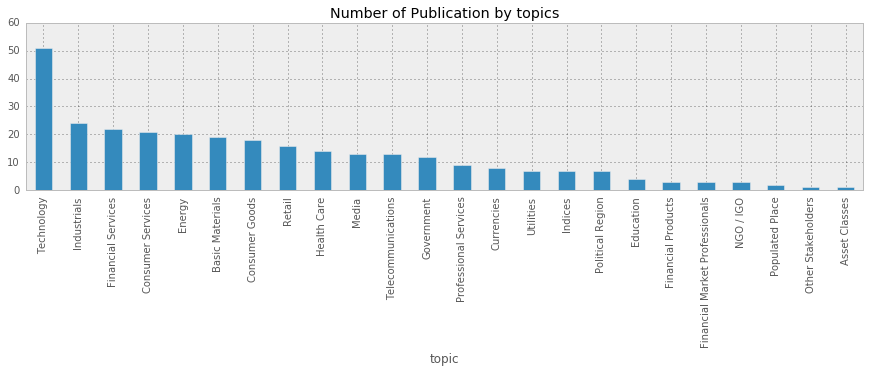

In [1140]:
dfClean.groupby(['topic'])['publication_id'].count().sort_values(ascending=False).plot(kind='bar', title='Number of Publication by topics')

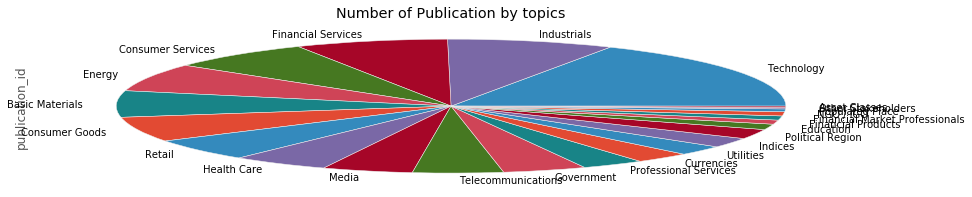

In [1141]:
dfClean.groupby(['topic'])['publication_id'].count().sort_values(ascending=False).plot(kind='pie', title='Number of Publication by topics')

The popular publication topics are: Technology, Industrials, Financial Services, Consumer Services.


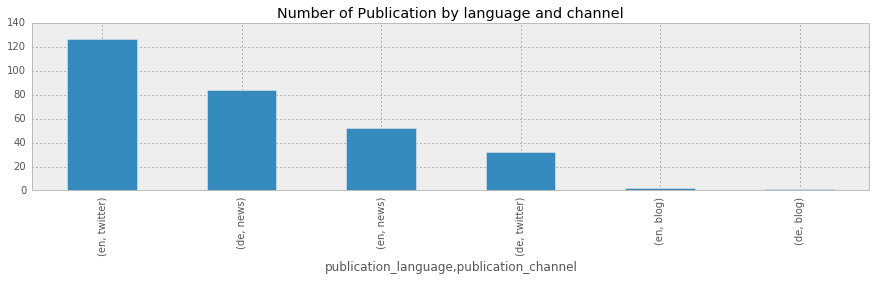

In [1142]:
dfClean.groupby(['publication_language', 'publication_channel'])['publication_id'].count().sort_values(ascending=False).plot(kind='bar', title='Number of Publication by language and channel')

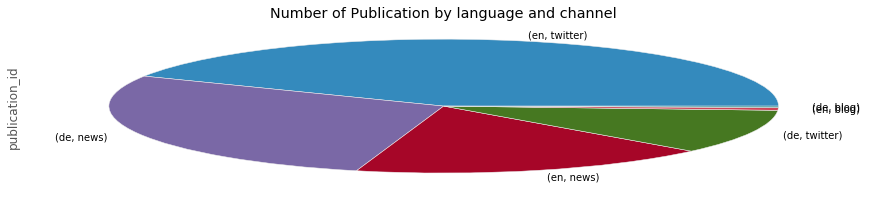

In [1143]:
dfClean.groupby(['publication_language', 'publication_channel'])['publication_id'].count().sort_values(ascending=False).plot(kind='pie', title='Number of Publication by language and channel')

The popular source of publications are english and germany from twitter and news.

## b) Visualize the distribution of all predicted_relevance_probability values

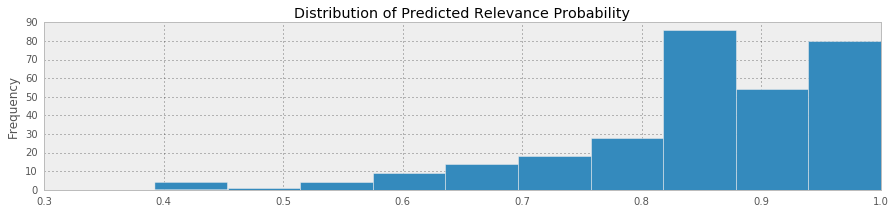

In [1144]:
dfClean['predicted_relevance_probability'].plot(kind='hist', title = 'Distribution of Predicted Relevance Probability')

## c) Compare the distribution of predicted_relevance_probability when is_relevant = True against when is_relevant = False

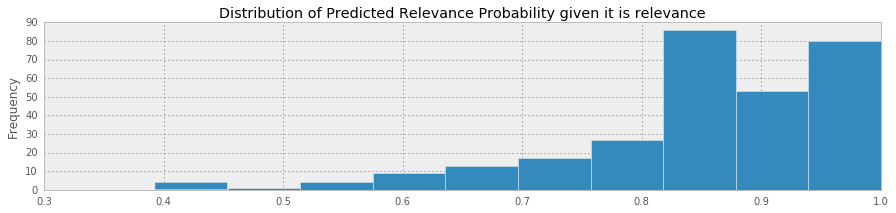

In [1145]:
dfClean[dfClean['is_relevant'] == True]['predicted_relevance_probability'].plot(kind='hist', title = 'Distribution of Predicted Relevance Probability given it is relevance')

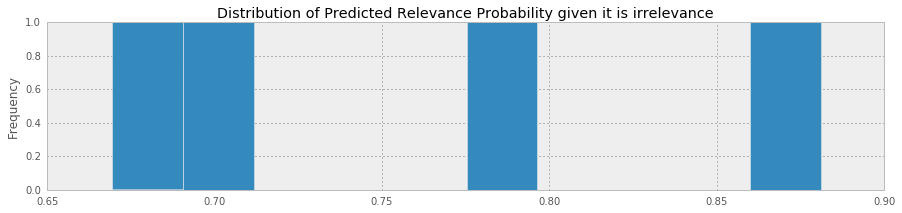

In [1146]:
dfClean[dfClean['is_relevant'] == False]['predicted_relevance_probability'].plot(kind='hist', title='Distribution of Predicted Relevance Probability given it is irrelevance')

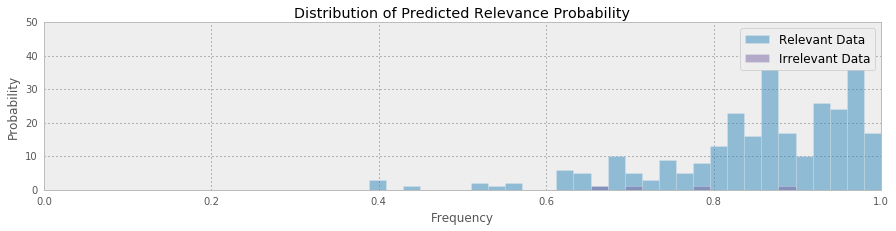

In [1147]:
import numpy
from matplotlib import pyplot

relevantData = dfClean[dfClean['is_relevant'] == True]['predicted_relevance_probability']
irrelevantData = dfClean[dfClean['is_relevant'] == False]['predicted_relevance_probability']

bins = numpy.linspace(0, 1, 50)
pyplot.hist(relevantData, bins, alpha=0.5, label='Relevant Data')
pyplot.hist(irrelevantData, bins, alpha=0.5, label='Irrelevant Data')
pyplot.legend(loc='upper right')
pyplot.title('Distribution of Predicted Relevance Probability')
pyplot.xlabel('Frequency')
pyplot.ylabel('Probability')
pyplot.show()

## d) Visualize aggregation 2c above

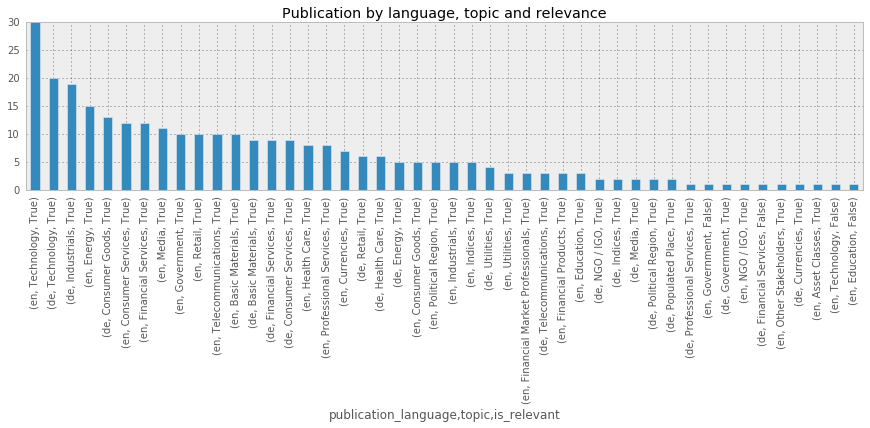

In [1148]:
dfClean.groupby(['publication_language', 'topic', 'is_relevant'])['publication_id'].count().sort_values(ascending=False).plot(kind='bar', title = 'Publication by language, topic and relevance')

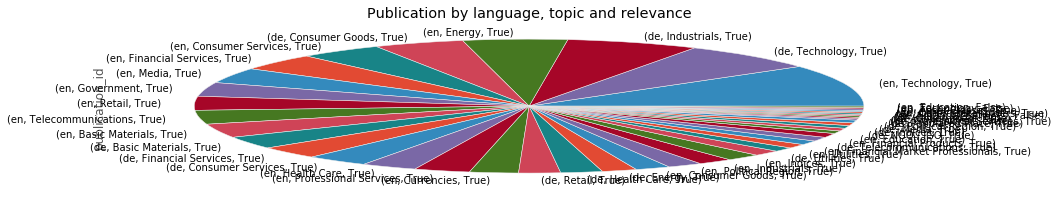

In [1149]:
dfClean.groupby(['publication_language', 'topic', 'is_relevant'])['publication_id'].count().sort_values(ascending=False).plot(kind='pie', title = 'Publication by language, topic and relevance')

For data visualization I like to use build-in plot function of pandas because it is much faster than use other specified visualization package.
It is faster, easy to understand but not as beautiful as other visualization package.

# 4) Measuring prediction performance:    

## a) With is_relevant as ground truths and predicted_relevance_probability as predictions, compute performance metrics for this sample at Threshold = 0.50

### __Knowledge review__
__True Positive (TP)__: correctly classified as positive
__True Negative (TN)__: correctly classified as negative
__False Positive (FP)__: wrongly classified as positive
__False Negative (FN)__: wrongly classified as negative

__F1 score: __ $$F1 = 2TP/(2TP+FP+FN)$$
__Precision: __ $$Precision = TP/(TP+FP)$$
__Recall: __ $$Recall = TP/(TP+FN)$$
__Accuracy: __ $$Accuracy = (TP+TN)/(TP+FP+TN+FN)$$

In [1150]:
dfClean.columns

Index(['publication_time', 'publication_id', 'duplicate_id',
       'publication_channel', 'publication_language',
       'predicted_relevance_probability', 'topic', 'is_relevant',
       'verification_date', 'reference2'],
      dtype='object')

In [1151]:
#prediction
dfClean['prediction'] = dfClean['predicted_relevance_probability'] >= 0.5
dfClean['prediction'].describe()

count      298
unique       2
top       True
freq       294
Name: prediction, dtype: object

In [1152]:
theTrue = dfClean['is_relevant'].astype('bool').as_matrix()
prediction = dfClean['prediction'].as_matrix()
print(theTrue.dtype)
print(prediction.dtype)

bool
bool


In [1153]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
 
accuracy = accuracy_score(theTrue, prediction)
precision, recall, f1_score, _ = precision_recall_fscore_support(theTrue, prediction, average='binary')
 
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

Accuracy:  0.973154362416
Precision:  0.986394557823
Recall:  0.986394557823
F1 score:  0.986394557823


**Compute Accuracy, Precision, Recall, F1 score： **

I use build-in fuction from sklearn package to compute Accuracy, Precision, Recal, F1 score. It will be faster for me. I just need tho change the data type of the input. The buil-in function will take care the rest.

## b) With is_relevant as ground truths and predicted_relevance_probability as predictions, compute performance metrics for this sample for publication_language = “de” at these Threshold values [0.40, 0.50, 0.60, 0.70, 0.80, 0.90]. Among those threshold values, which will give the highest  F1-score for publication_language = “de”?

In [1154]:
threshold = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [1155]:
theTrueB = dfClean[dfClean['publication_language'] == 'de']['is_relevant'].astype('bool').as_matrix()
print(theTrueB.dtype)
print(theTrueB.shape)


bool
(117,)


In [1156]:
predictDict = {} #keep track of threshold and prediction list, key is threshold, value is prediction list.
for key in threshold:
    predictDict[key] = dfClean[dfClean['publication_language'] == 'de']['predicted_relevance_probability'].values >= key
print(len(predictDict[0.4]))#test the length of prediction list at threshold 0.4

117


In [1157]:
keepF1 = [] #keep track of f1 score through threshold iteration.
for i in threshold:
    print('consider threshold of: ' + str(i))
    accuracy = accuracy_score(theTrueB, predictDict[i])
    precision, recall, f1_score, _ = precision_recall_fscore_support(theTrueB, predictDict[i], average='binary')
    print('Accuracy： ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F1 score: ', f1_score)
    keepF1.append(f1_score)
    
#find max f1_score
print('the index of threshold that give maximum F1 score: ', keepF1.index(max(keepF1)))
print('the threshold give maximum F1 score is: ', threshold[keepF1.index(max(keepF1))])
print('the maximum F1 score can achieve is: ', max(keepF1))

    
    

consider threshold of: 0.4
Accuracy：  0.991452991453
Precision:  0.991452991453
Recall:  1.0
F1 score:  0.995708154506
consider threshold of: 0.5
Accuracy：  0.965811965812
Precision:  0.991228070175
Recall:  0.974137931034
F1 score:  0.982608695652
consider threshold of: 0.6
Accuracy：  0.923076923077
Precision:  0.990825688073
Recall:  0.931034482759
F1 score:  0.96
consider threshold of: 0.7
Accuracy：  0.837606837607
Precision:  0.989898989899
Recall:  0.844827586207
F1 score:  0.911627906977
consider threshold of: 0.8
Accuracy：  0.760683760684
Precision:  1.0
Recall:  0.758620689655
F1 score:  0.862745098039
consider threshold of: 0.9
Accuracy：  0.367521367521
Precision:  1.0
Recall:  0.362068965517
F1 score:  0.53164556962
the index of threshold that give maximum F1 score:  0
the threshold give maximum F1 score is:  0.4
the maximum F1 score can achieve is:  0.995708154506


for data set of language is Germany, the threshold that give highest F1 score is 0.4, and F1 score value is 0.996

## c) Determine the Threshold (precise to 4 decimal points e.g. 0.1234) such that the F1-score for this sample for publication_language = “en” is highest

In [1158]:
theTrueC = dfClean[dfClean['publication_language'] == 'en']['is_relevant'].astype('bool').as_matrix()
print(theTrueC.dtype)
print(theTrueC.shape)


bool
(181,)


In [1159]:
#using binary search for this problem.
thresholdsBest = [] # keep track of current best thresholds
f1ScoresBest = [] # keep track of current best f1 score
threshold = 0
for i in range(10000):
    threshold += 0.0001
    prediction = dfClean[dfClean['publication_language'] == 'en']['predicted_relevance_probability'].values >= threshold
    precision, recall, f1_score, _ = precision_recall_fscore_support(theTrueC, prediction, average='binary')
    thresholdsBest.append(threshold)
    f1ScoresBest.append(f1_score)
#print('thresholds: ', thresholdsBest)
#print('f1 scores: ', f1ScoresBest)
print('the best f1_score is ', max(f1ScoresBest))
print('the best threshold is: ', thresholdsBest[f1ScoresBest.index(max(f1ScoresBest))])

    
    

the best f1_score is  0.991643454039
the best threshold is:  0.0001


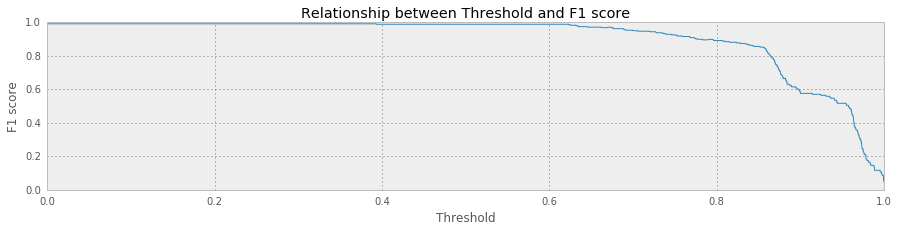

In [1160]:
plt.plot(thresholdsBest, f1ScoresBest)
pyplot.xlabel('Threshold')
pyplot.ylabel('F1 score')
pyplot.title('Relationship between Threshold and F1 score')
plt.show()

__find the threshold such that f1 score is highest explanation: __

since the threshold is vary from 0 to 1 and your solution error requirement is 0.0001. Therefore, it will need 10.000 iteration to cover all possible solutions. 10.000 iterations are not so computation expensive therefore I choose to interate all possible solution to find the best solution.

I also want to capture the relationship between threshold and F1 score. So, I design the code to capture the relationship between threshold and F1 score. You can see from the figure that with threshold from 0 to 0.3 we an acheive the highest F1 score of 1. As threshold increases the F1 score also decreases.

# 5) Based on the analysis you have done (within and/or beyond the scope of the above tasks), what can you conclude about this classifier and which feature/variable should we investigate further to improve it?

__See the unbalance in the testing data__ 

In [1161]:
dfClean['is_relevant'].value_counts() # for all data set

True     294
False      4
Name: is_relevant, dtype: int64

In [1162]:
dfClean[dfClean['publication_language'] == 'de']['is_relevant'].value_counts() # fro publication_language = germany

True     116
False      1
Name: is_relevant, dtype: int64

In [1163]:
dfClean[dfClean['publication_language'] == 'en']['is_relevant'].value_counts() # for publication_language = english

True     178
False      3
Name: is_relevant, dtype: int64

It is very hard to conclude any thing about this classifier since the testing data is extremely unbalance. We can just simply decrease the threshold to get F1 score increase.

From normal logic, it is save to say that topic will be a good feature/variable to investigate and see the relation between topic and classification decision. Let do some simple analysis:

In [1164]:
dfClean.pivot_table(index=['topic'], columns =['is_relevant'], values=['publication_id'], aggfunc='count')

publication_id      
is_relevant                             False True 
topic                                              
Asset Classes                             NaN   1.0
Basic Materials                           NaN  19.0
Consumer Goods                            NaN  18.0
Consumer Services                         NaN  21.0
Currencies                                NaN   8.0
Education                                 1.0   3.0
Energy                                    NaN  20.0
Financial Market Professionals            NaN   3.0
Financial Products                        NaN   3.0
Financial Services                        1.0  21.0
Government                                1.0  11.0
Health Care                               NaN  14.0
Indices                                   NaN   7.0
Industrials                               NaN  24.0
Media                                     NaN  13.0
NGO / IGO                                 NaN   3.0
Other Stakeholders                        NaN   1.0
Political Region                          NaN   7.0
Populated Place                           NaN   2.0
Professional Services                     NaN   9.0
Retail                                    NaN  16.0
Technology                                1.0  50.0
Telecommunications                        NaN  13.0
Utilities                                 NaN   7.0

The above table shows the relation between topic and relevance decision. Education topic is worth notice here because the data has totally 4 publications in education but one of them is irrelevant. The irrelevant rate in education topic is much higher than the other topics.